## Test  with music21 library

In [2]:
from music21 import converter, midi, environment
from utilities.constants import *
import mido
import os
from utilities.temporal_analysis import *
import pandas as pd
import re
import matplotlib.pyplot as plt
from utilities.model_matching_computation import *
import pandas as pd
from music21 import *
from utilities.corpus_search import *

In [3]:
track = 'aecf65c2-ef6a-4e7a-a123-24fbe757684e'

c = converter.parse(DF_PATH_TRACKS + track + '/' + track + '.xml')
c.analyze('key')

midi_filename = "test_file.mid"
midi_file = midi.translate.music21ObjectToMidiFile(c)
midi_file.open(midi_filename, 'wb')
midi_file.write()
midi_file.close()

# We load the created midi file
midi_data = mido.MidiFile(midi_filename)
total_seconds = midi_data.length
print(f"Total MIDI Duration: \t {total_seconds:.2f} seconds \t {total_seconds / 60:.2f} minutes")
os.remove("test_file.mid")
"""
# Show the PNG of the score
env = environment.UserSettings()
env['musescoreDirectPNGPath'] = r"C:/Program Files/MuseScore 3/bin/MuseScore3.exe"
#c.show()
test_plot = c.measures(1, 10)
test_plot.plot('horizontalBar')
print(f"Number of measures in track : {len(c.measures(1, 600))}")
for tn in (c.recurse().notes):
    print([tn.step, tn.octave, tn.duration.quarterLength])"""
    
timestamps = get_timestamps_from_all_corpus()
timestamps.to_json('note_corpus.json', orient='split', compression='infer')

Total MIDI Duration: 	 2704.18 seconds 	 45.07 minutes


IndexError: list index out of range

In [ ]:
plit = 5
test_dim = 5
label = 'nawba'
X = df.filter(['section_id', label])
y = df.filter([label])
df_labeled_notes_t1['NoteAndRest'] = df_labeled_notes_t1['NoteAndRest'].apply(lambda x: re.sub(r'\d+', '', x))

label_models = []
overall_acc = []
actual = []
predicted = []

test_indices = []
train_indices = []

for label_t in y[label].unique():
    label_indices = y[y[label] == label_t].index.to_list()

    # SET REPRODUCIBLE SEED FOR SHUFFLE
    np.random.seed(3 * 6)  
    np.random.shuffle(label_indices)
    time = 0
    index = 0
    while time < 30000:
        train_indices.append(label_indices[index])  
        time += df_labeled_notes_t1[df_labeled_notes_t1['section_id'].str.contains(X.loc[label_indices[index]][0], na=False)]['timestamp_(scs)'].max()
        index += 1

    time = 0
    while time < 4800:
        test_indices.append(label_indices[index])  
        time += df_labeled_notes_t1[df_labeled_notes_t1['section_id'].str.contains(X.loc[label_indices[index]][0], na=False)]['timestamp_(scs)'].max()
        index += 1
    
    
X_train, X_test = X.loc[train_indices], X.loc[test_indices]
_, y_test = y.loc[train_indices], y.loc[test_indices]

for nawba in NAWBA_LIST_TRAIN:
    tracks = X_test[X_test['nawba'] == nawba]['section_id']
    time = 0
    for track in tracks:
        time += df_labeled_notes_t1[df_labeled_notes_t1['section_id'].str.contains(track, na=False)]['timestamp_(scs)'].max()
    print(f"Time for nawba {nawba}: {time / 60:.2f}")

In [2]:
track = '2cf367de-583b-4bd6-83f3-fc036fe19fab'
df_labeled_notes_t1 = pd.read_json('note_corpora.json', orient ='split', compression = 'infer')
df_labeled_notes_t1[df_labeled_notes_t1['section_id'].str.contains(track, na=False)][5000:5600]

,NoteAndRest,timestamp_(scs),measure_number,quarterLength,mizan,form,section_id
5000,F4,3033.46,720,0.5,2.0,18.0,2cf367de-583b-4bd6-83f3-fc036fe19fab5
5001,D4,3033.79,720,0.5,2.0,18.0,2cf367de-583b-4bd6-83f3-fc036fe19fab5
5002,E4,3034.12,721,0.5,2.0,18.0,2cf367de-583b-4bd6-83f3-fc036fe19fab5
5003,C4,3034.46,721,0.5,2.0,18.0,2cf367de-583b-4bd6-83f3-fc036fe19fab5
5004,D4,3034.79,721,1.5,2.0,18.0,2cf367de-583b-4bd6-83f3-fc036fe19fab5
...,...,...,...,...,...,...,...
5422,D4,3182.12,808,1.0,2.0,18.0,2cf367de-583b-4bd6-83f3-fc036fe19fab5
5423,G4,3182.87,808,1.0,2.0,18.0,2cf367de-583b-4bd6-83f3-fc036fe19fab5
5424,D4,3183.62,808,0.5,2.0,18.0,2cf367de-583b-4bd6-83f3-fc036fe19fab5
5425,Rest (0.5 beats),3184.00,808,0.5,2.0,18.0,2cf367de-583b-4bd6-83f3-fc036fe19fab5


In [ ]:

# Show the PNG of the score
env = environment.UserSettings()
env['musescoreDirectPNGPath'] = r"C:/Program Files/MuseScore 3/bin/MuseScore3.exe"
#c.show()
test_plot = c.measures(1, 10)
test_plot.plot('horizontalBar')
print(f"Number of measures in track : {len(c.measures(1, 600))}")
for tn in (c.recurse().notes):
    print([tn.step, tn.octave, tn.duration.quarterLength])

In [ ]:

df_labeled_notes_t1 = pd.read_json('note_corpora.json', orient ='split', compression = 'infer')
track = 'ec5d2ba0-7c04-4d87-83b9-f82d363ca319'
time_mismatch = []
"""
for track in get_all_id_tracks():
    print(track)
    path = DF_PATH_TRACKS + track + '/' + track + '.xml'
    path_mp3 = DF_PATH_TRACKS + track + '/' + track + '.mp3'
    if os.path.exists(path):
        c = converter.parse(path)
        l1 = get_timestamps_from_corpus(c)[-1][1]
        l2= MP3(path_mp3).info.length
        time_mismatch.append(abs(l1 -l2))
        print(l1, l2)
"""

        #print(l1, l2)

2247.5 2550.055375
615.0 526.79325
4303.92 4439.9100625
2252.22 426.53075
1474.8 2617.4432
757.95 1157.3586875
1870.69 2340.0512
2602.62 2019.765375
4145.4 2887.2512
2124.6 1832.2592
2165.62 2637.1472
878.36 619.5514583333334
3087.7 3425.768
1477.26 2259.584
1716.59 2878.1792
3124.22 3800.7156875
3684.25 3229.2841875
1680.45 2142.0512
2312.0 2649.7952
744.25 742.9800416666667
2238.8 2600.3552
154.2 164.36779166666668
2140.7 2504.284625
1366.97 2592.6032
829.0 681.3859375
2023.87 2264.9072
4131.62 3283.6352
1406.33 1509.92
433.75 317.9443125
2252.22 1293.591625
2957.74 3218.2352
258.45 570.888
2383.62 2564.2832
1207.37 963.427375
1472.15 2524.9712
1043.82 1052.0608333333332
2666.58 2717.4512
874.03 646.7736875
3102.58 3565.0592
1551.09 2388.3632
2638.77 480.72391666666664
1443.16 3256.2752
1235.09 1155.2733125
2479.79 2748.68
2114.4 2343.3392
561.0 583.53125
6935.37 3527.2592
2570.25 2634.2432
1155.69 1236.968
1715.17 1872.9392
2860.82 3634.5872
2993.96 2840.6912
765.0 716.96475
740.75 

In [98]:
THRESHOLD_MINUTES = 5 * 60
times = ([t[1] for t in time_mismatch])
print(f"Average mismatch in minutes {(sum(times) / len(time_mismatch)) / 60:.2f}")
print(len([y[1] / 60 for y in time_mismatch if y[1] <= THRESHOLD_MINUTES]))


Average mismatch in minutes 7.58
85


In [117]:

max_tuple = max(time_mismatch, key=lambda tup: tup[1])
print(max_tuple)
time_mismatch_t = time_mismatch.remove(max_tuple)

max_tuple = max(time_mismatch, key=lambda tup: tup[1])
print(max_tuple)
time_mismatch_t = time_mismatch.remove(max_tuple)

max_tuple = max(time_mismatch, key=lambda tup: tup[1])
print(max_tuple)

time_mismatch_t = time_mismatch.remove(max_tuple)

max_tuple = max(time_mismatch, key=lambda tup: tup[1])
print(max_tuple)

('2cf367de-583b-4bd6-83f3-fc036fe19fab', 2973.1428)
('0b671737-40b7-4dd3-9baf-d7c9cded139f', 2158.046083333333)
('7e3ee6f2-c42f-4da4-9816-45aadcffea88', 2140.454)
('0fb722f6-35a3-436b-9316-4c2de2b86cc7', 1942.732)


In [120]:
times = ([t[1] for t in time_mismatch])
times.sort()
times

[0.21568749999983083,
 0.8928000000000793,
 1.2699583333333067,
 1.7531250000000114,
 1.961458333333212,
 2.4382499999999823,
 3.4743124999999964,
 8.240833333333285,
 8.730000000000018,
 10.167791666666687,
 13.771250000000009,
 15.471199999999953,
 20.965000000000032,
 22.53125,
 26.29574999999977,
 28.37662499999999,
 29.00475,
 29.080687500000067,
 37.64675,
 44.565958333333356,
 45.126000000000204,
 48.03525000000002,
 50.871200000000044,
 53.98099999999977,
 58.353200000000015,
 58.50649999999996,
 61.25100000000009,
 62.346874999999955,
 62.55475000000001,
 63.99319999999989,
 66.09406250000006,
 66.98000000000002,
 70.01080000000002,
 74.10356250000001,
 74.5150625,
 79.24737500000003,
 79.81668749999994,
 81.27800000000002,
 88.04062500000003,
 88.20675000000006,
 99.89400000000023,
 103.54200000000037,
 103.59000000000015,
 115.80568749999998,
 120.83919999999989,
 121.60637499999984,
 132.45280000000002,
 135.99006250000002,
 137.01800000000003,
 138.79516666666666,
 147.614

In [95]:

times = ([t[1] for t in time_mismatch])
print(f"Average mismatch in minutes {(sum(times) / len(time_mismatch)) / 60:.2f}")
print(len([y[1] / 60 for y in time_mismatch if y[1] <= THRESHOLD_MINUTES]))

Average mismatch in minutes 6.45
85


In [124]:
track = '7e3ee6f2-c42f-4da4-9816-45aadcffea88'
#for track in get_all_id_tracks():
path_mp3 = DF_PATH_TRACKS + track + '/' + track + '.mp3'
path = DF_PATH_TRACKS + track + '/' + track + '.xml'
if os.path.exists(path):
    c = converter.parse(path)
    l1 = midi_filename = "test_file.mid"
    midi_file = midi.translate.music21ObjectToMidiFile(c)
    midi_file.open(midi_filename, 'wb')
    midi_file.write()
    midi_file.close()

    # We load the created midi file
    midi_data = mido.MidiFile(midi_filename)
    l1 = midi_data.length
    l2= MP3(path_mp3).info.length
    print("MIDI ", l1)
    print("XML ", df_labeled_notes_t1[df_labeled_notes_t1['section_id'].str.contains(track, na=False)]['timestamp_(scs)'].max())
    print("MP3", l2)
    print("------------------")

MIDI  1827.000913499953
XML  1827.33
MP3 3967.784
------------------


In [3]:
df_labeled_notes_t1 = pd.read_json('note_corpora.json', orient ='split', compression = 'infer')
#df_labeled_notes_t1.to_json('note_corpora.json', orient = 'split', compression = 'infer', default_handler=str)
#FORM_LIST

df_labeled_notes_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769352 entries, 0 to 12394
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NoteAndRest      769352 non-null  object 
 1   timestamp_(scs)  769352 non-null  float64
 2   measure_number   769352 non-null  int64  
 3   quarterLength    769352 non-null  object 
 4   mizan            727573 non-null  float64
 5   form             727573 non-null  float64
 6   section_id       769352 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 47.0+ MB


In [8]:
from utilities.corpus_search import *

# LABELING
df_labeled_notes_t1['NoteAndRest'] = df_labeled_notes_t1['NoteAndRest'].apply(lambda x: re.sub(r'\d+', '', x))

start_time_seconds = []
df_sections = parse_all_tracks_sections()
for section in df_sections['end_time']:
    tn = section.split(':')
    start_time_seconds.append((int(tn[0]) * 3600) + (int(tn[1]) * 60) + int(tn[2]))
df_sections['end_time_secs'] = start_time_seconds 

for column in ['nawba', 'tab', 'form', 'mizan']:
    df_sections[column] = df_sections[column].apply(lambda x: x['id'])

mizan_accumulated_time = []
curr_mizan = 1
for i in range(0, len(df_sections) - 1):
    next_mizan = df_sections['mizan'].iloc[i]
    if curr_mizan != next_mizan:
        mizan_accumulated_time.append((next_mizan, df_sections['end_time_secs'].iloc[i - 1]))
        curr_mizan = next_mizan
    

mizan_accumulated_time_df = pd.DataFrame(mizan_accumulated_time, columns= ['mizan', 'time'])
for mizan in MIZAN_LIST:
    print(f"Minutes of playing time for mizan [{mizan}] : \
          {mizan_accumulated_time_df[mizan_accumulated_time_df['mizan'] == mizan]['time'].sum() / 60:.2f}")
    


Minutes of playing time for mizan [1] :           8883.52
Minutes of playing time for mizan [2] :           1217.23
Minutes of playing time for mizan [3] :           1291.77
Minutes of playing time for mizan [4] :           28.62
Minutes of playing time for mizan [5] :           446.45
Minutes of playing time for mizan [6] :           51.32
Minutes of playing time for mizan [7] :           11.92
Minutes of playing time for mizan [8] :           98.43
Minutes of playing time for mizan [9] :           168.93
Minutes of playing time for mizan [10] :           750.57
Minutes of playing time for mizan [11] :           1568.37


In [9]:
FORM_LIST = [i for i in range (1, 32)]

form_accumulated_time = []
curr_form = 1
for i in range(0, len(df_sections) - 1):
    next_form = df_sections['form'].iloc[i]
    if curr_form != next_form:
        form_accumulated_time.append((next_form, df_sections['end_time_secs'].iloc[i - 1]))
        curr_form = next_form
    

form_accumulated_time_df = pd.DataFrame(form_accumulated_time, columns= ['form', 'time'])
for form in FORM_LIST:
    print(f"Minutes of playing time for form [{form}] : \
          {form_accumulated_time_df[form_accumulated_time_df['form'] == form]['time'].sum() / 60:.2f}")
    


Minutes of playing time for form [1] :           2207.65
Minutes of playing time for form [2] :           4891.48
Minutes of playing time for form [3] :           0.00
Minutes of playing time for form [4] :           48.78
Minutes of playing time for form [5] :           11.48
Minutes of playing time for form [6] :           11.13
Minutes of playing time for form [7] :           0.00
Minutes of playing time for form [8] :           17.83
Minutes of playing time for form [9] :           25.13
Minutes of playing time for form [10] :           12.63
Minutes of playing time for form [11] :           8.88
Minutes of playing time for form [12] :           4.80
Minutes of playing time for form [13] :           22.47
Minutes of playing time for form [14] :           20.83
Minutes of playing time for form [15] :           28.62
Minutes of playing time for form [16] :           24.03
Minutes of playing time for form [17] :           5566.72
Minutes of playing time for form [18] :           1181.

We discard mizan number 4, 6, 7

In [4]:
section_id = df_labeled_notes_t1['section_id'].unique()

# Group by 'section_id' and collect 'mizan' values in a list
df_labeled_notes_t1 = df_labeled_notes_t1.dropna()
df_labeled_notes_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727573 entries, 0 to 11587
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NoteAndRest      727573 non-null  object 
 1   timestamp_(scs)  727573 non-null  float64
 2   measure_number   727573 non-null  int64  
 3   quarterLength    727573 non-null  object 
 4   mizan            727573 non-null  float64
 5   form             727573 non-null  float64
 6   section_id       727573 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 44.4+ MB


In [5]:

df = df_labeled_notes_t1.groupby('section_id', as_index=False)['mizan'].first()
df = df[df['mizan'].isin(MIZAN_LIST_TRAIN)]
df = df[df['section_id'] != 'b11237b9-d45b-4b3a-a97b-ab7d198f927f6']
df = df[df['section_id'] != '3bb348f5-417d-4646-9041-42b935c54c287']
df = df[df['section_id'] != '4644f251-c85c-47a4-a1a7-1ca264d3c5d81']
df = df[df['section_id'] != '3bb348f5-417d-4646-9041-42b935c54c286']
X = df.filter(['section_id', 'mizan'])
y = df.filter(['mizan'])
df_labeled_notes_t1['NoteAndRest'] = df_labeled_notes_t1['NoteAndRest'].apply(lambda x: re.sub(r'\d+', '', x))


y_test, y_pred, overall_acc = skf_model_matching_label(df, df_labeled_notes_t1, std= 30, split= 3, label= 'mizan')    
print_performance(y_test, y_pred, overall_acc)


KeyError: 1

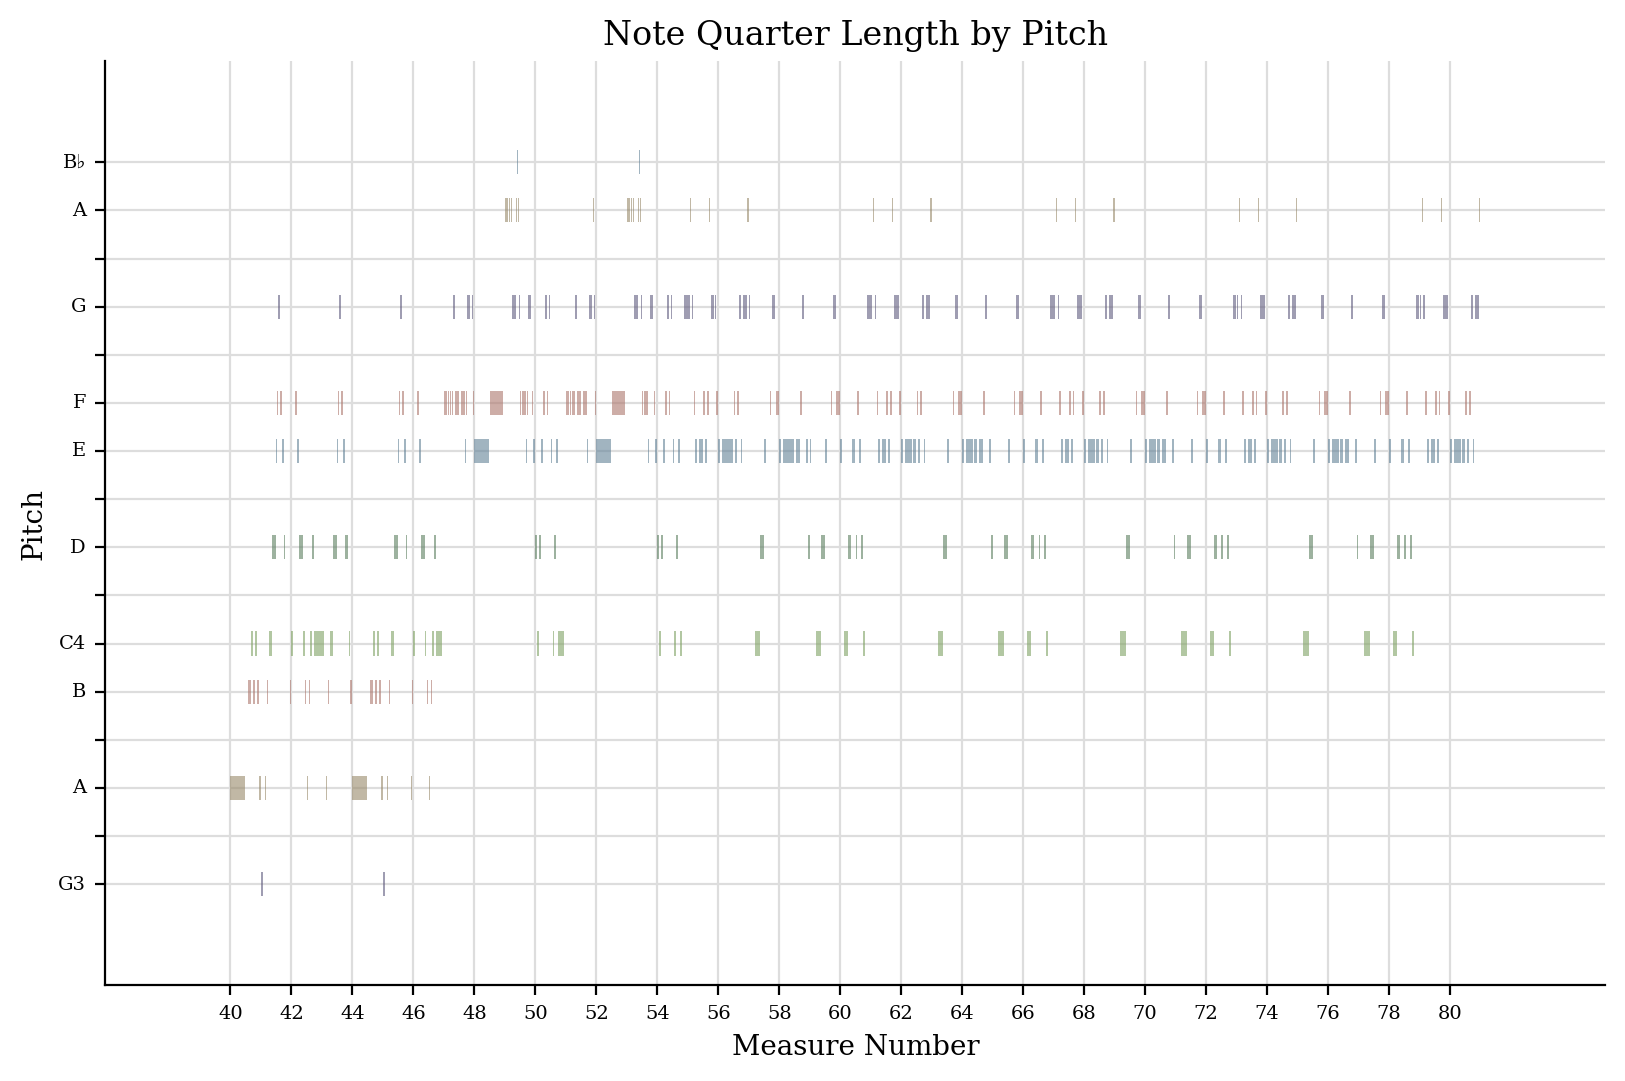

In [6]:
test_plot = c.measures(40, 80)
test_plot.plot('horizontalBar')

Precision: 0.448718
Std. Deviation: 0.0327
Weighted recall for each class: 0.448718
Global recall: 0.448718
F1 score: 0.448718


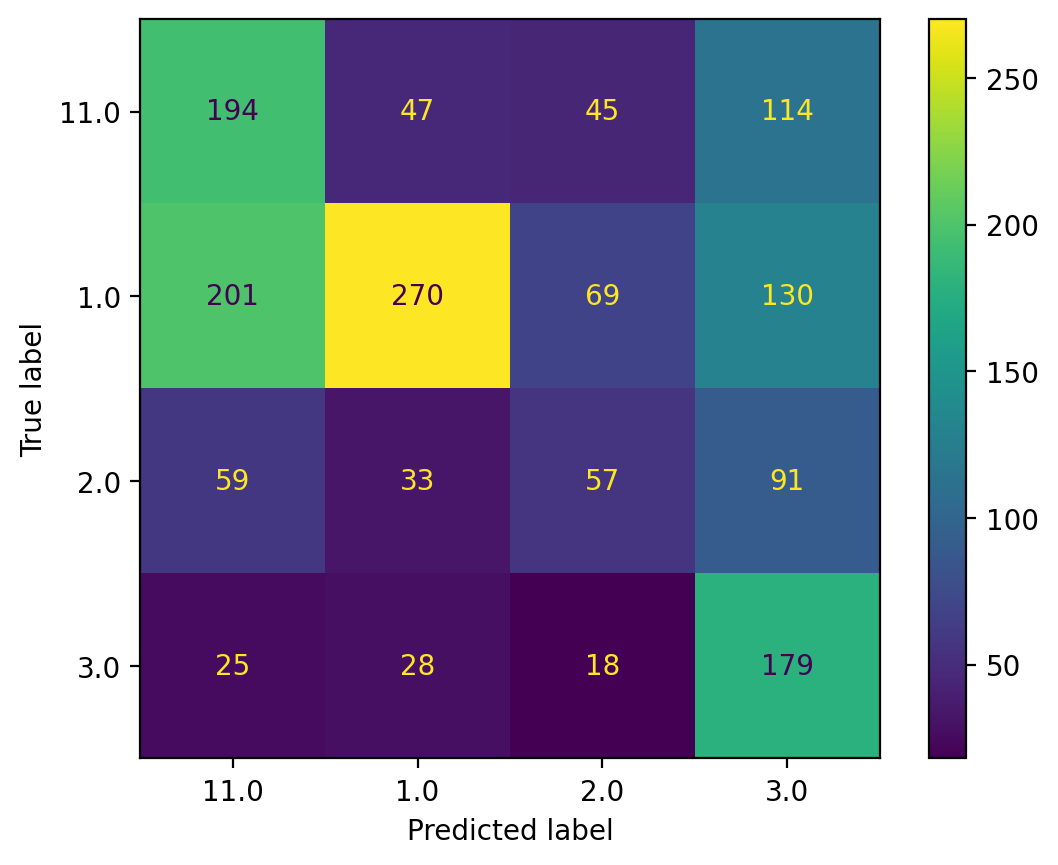

In [33]:
section_id = df_labeled_notes_t1['section_id'].unique()

df = df_labeled_notes_t1.groupby('section_id', as_index=False)['mizan'].first()
df = df[df['mizan'].isin(MIZAN_LIST_TRAIN)]

y_test, y_pred, overall_acc = skf_template_rhythm_matching(df, df_labeled_notes_t1, std= 20, split= 10, rn = 5)
print_performance(y_test, y_pred, overall_acc)


In [40]:

df = df_labeled_notes_t1.groupby('section_id', as_index=False)['form'].first()
FORM_LIST_TRAIN = [1, 2, 17, 18, 19, 20]
df = df[df['form'].isin(FORM_LIST_TRAIN)]
def test(df, df_notes, std, split, rn):
    X = df.filter(['section_id', 'form'])
    y = df.filter(['form'])
    form_models = []
    overall_acc = []
    actual = []
    predicted = []

    for i in range(split):
        X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, stratify=y, random_state= i * rn)

        for form in FORM_LIST_TRAIN:
            
            ql = df_notes[(df_notes['form'] == form) & 
                                    (df_notes['section_id'].isin(X_train['section_id'].tolist()))
                                    ]['quarterLength'].tolist()
            
            hist_y_avg = get_folded_rhythm_histogram(ql)
            _, y_model = convert_folded_scores_in_models_rythm([hist_y_avg], std)
            form_models.append(y_model[0])
            
            test_models = []
            curr_acc = []
        for j in range(len(X_test)):    
            ql = df_notes[df_notes['section_id'] == X_test['section_id'].iloc[j]]['quarterLength'].tolist()
            hist_y_avg = get_folded_rhythm_histogram(ql)
            
            _, y_model_test = convert_folded_scores_in_models_rythm([hist_y_avg], std)
            test_models.append(y_model_test[0])
            label_score = []
            for l, label_t2 in enumerate(FORM_LIST_TRAIN):
                label_score.append((get_distance(y_model_test[0], form_models[l], 'L2'), label_t2))
            curr_acc.append(y_test.iloc[j]['form'] == min(label_score)[1])
            
            actual.append(y_test.iloc[j]['form'])
            predicted.append(min(label_score)[1])
        overall_acc.append(sum(curr_acc) / len(curr_acc))
        
    return actual, predicted, overall_acc, form_models

_, _, acc, form_models = test(df, df_labeled_notes_t1, std= 30, split= 10, rn = 3)

1
2
17
18
19
20
1
2
17
18
19
20
1
2
17
18
19
20
1
2
17
18
19
20
1
2
17
18
19
20
1
2
17
18
19
20
1
2
17
18
19
20
1
2
17
18
19
20
1
2
17
18
19
20
1
2
17
18
19
20


[np.float64(0.3464566929133858),
 np.float64(0.3543307086614173),
 np.float64(0.33858267716535434),
 np.float64(0.28346456692913385),
 np.float64(0.3228346456692913),
 np.float64(0.2992125984251969),
 np.float64(0.3228346456692913),
 np.float64(0.28346456692913385),
 np.float64(0.33858267716535434),
 np.float64(0.28346456692913385)]

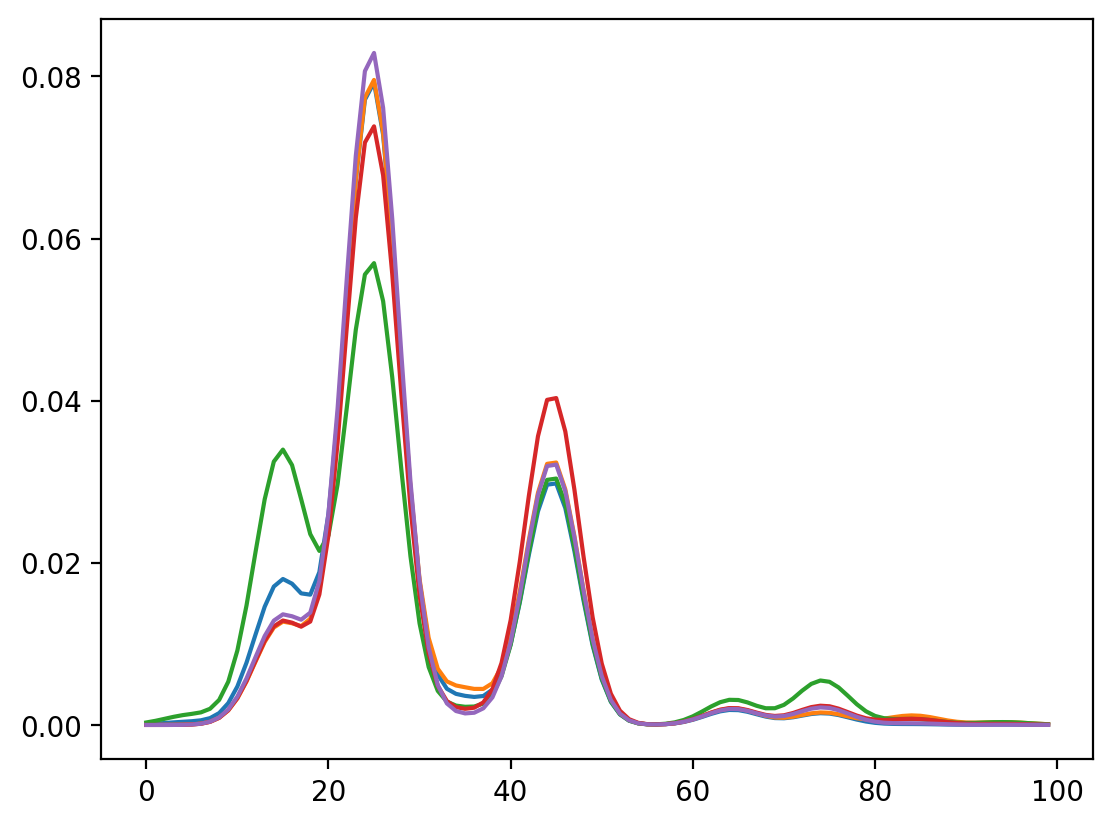

In [39]:
plt.plot(form_models[0])
plt.plot(form_models[1])
plt.plot(form_models[2])
plt.plot(form_models[3])
plt.plot(form_models[4])
acc

In [1]:
import graphmuse as gm
track = '0fb722f6-35a3-436b-9316-4c2de2b86cc7'

c = converter.parse(DF_PATH_TRACKS + track + '/' + track + '.xml')
c.analyze('key')

midi_filename = "test_file.mid"
midi_file = midi.translate.music21ObjectToMidiFile(c)
midi_file.open(midi_filename, 'wb')
midi_file.write()
midi_file.close()

# We load the created midi file
midi_data = mido.MidiFile(midi_filename)



NameError: name 'converter' is not defined

In [14]:
import partitura
import torch
track = '0b671737-40b7-4dd3-9baf-d7c9cded139f'
score = partitura.load_musicxml(DF_PATH_TRACKS + track + '/' + track + '.xml')
note_array = score.note_array()
feature_array = torch.rand((len(note_array), 10)) 
score_graph = gm.create_score_graph(feature_array, note_array)

/home/ale/miniconda3/envs/pyg-env/lib/python3.9/site-packages/partitura/directions.py:514: UserWarning: error parsing "Tawshiya" (UnexpectedCharacters)
  warnings.warn('error parsing "{}" ({})'.format(string, type(e).__name__))
/home/ale/miniconda3/envs/pyg-env/lib/python3.9/site-packages/partitura/directions.py:514: UserWarning: error parsing "Assobho anar" (UnexpectedCharacters)
  warnings.warn('error parsing "{}" ({})'.format(string, type(e).__name__))
/home/ale/miniconda3/envs/pyg-env/lib/python3.9/site-packages/partitura/directions.py:514: UserWarning: error parsing "Dalamo allayli" (UnexpectedCharacters)
  warnings.warn('error parsing "{}" ({})'.format(string, type(e).__name__))
/home/ale/miniconda3/envs/pyg-env/lib/python3.9/site-packages/partitura/io/importmusicxml.py:1060: UserWarning: ignoring direction type: metronome {'default-y': '42', 'font-family': 'EngraverTextT', 'font-size': '10.25', 'relative-x': '-24'}
  warnings.warn("ignoring direction type: {} {}".format(dt.tag, 

In [15]:
print(score_graph)

HeteroData(
  note={
    x=[5229, 10],
    onset_div=[5229],
    duration_div=[5229],
    pitch=[5229],
  },
  (note, onset, note)={ edge_index=[2, 5229] },
  (note, consecutive, note)={ edge_index=[2, 4587] },
  (note, during, note)={ edge_index=[2, 0] },
  (note, rest, note)={ edge_index=[2, 641] },
  (note, consecutive_rev, note)={ edge_index=[2, 4587] },
  (note, during_rev, note)={ edge_index=[2, 0] },
  (note, rest_rev, note)={ edge_index=[2, 641] }
)
